In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

## Look at the Sentiment140 data

In [17]:
sent140_path = Path('data/sentiment140')
sent140_path.ls()

[PosixPath('data/sentiment140/models'),
 PosixPath('data/sentiment140/training.1600000.processed.noemoticon.csv'),
 PosixPath('data/sentiment140/data_sent140_lm.pkl')]

In [18]:
df_sent140 = pd.read_csv(sent140_path/'training.1600000.processed.noemoticon.csv', encoding='latin_1', header=None)

In [19]:
df_sent140.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']
df_sent140.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Pre-processing, filtering and deduplication

In [20]:
import re

url_re = re.compile(r'(https?:\/\/www\.|https?:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/\w*)?')
rep_re = re.compile(r'(.)\1{3,}')
mention_re = re.compile(r'(@[\w_-]+)')
hashtag_re = re.compile(r'(#[\w_-]+)')
email_re = re.compile(r'[a-zA-Z0-9.!#$%&\'*+/=?^_`{|}~-]+@[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?(?:\.[a-zA-Z0-9](?:[a-zA-Z0-9-]{0,61}[a-zA-Z0-9])?)*')

def preprocess(text):
    text = text.lower()   # ToDo: preserve case of emoticons such as :D
    text = email_re.sub('<email>', text)
    text = url_re.sub('<url>', text)
    text = rep_re.sub(r'\1\1', text)
    # Remove mentions but keep hashtags
    text = mention_re.sub('', text)

    return text

print(preprocess('@mention This is to #test a looooong link: http://www.google.com @apple pedro@latenitesoft.com'))
print(preprocess('More things after the URL: http://twitpic.com/2y1zl and a lot of words go here'))
print(preprocess('@switchfoot http://twitpic.com/2y1zl - Awww, that\'s a bummer.  You shoulda got David Carr of Third Day to do it. ;D'))
print(preprocess('email@domain.com and some words.'))

 this is to #test a loong link: <url>  <email>
more things after the url: <url> and a lot of words go here
 <url> - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d
<email> and some words.


In [21]:
# Deduplication: ToDo

In [22]:
df_sent140['tweet'] = df_sent140['tweet'].apply(preprocess)
df_sent140.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"<url> - awww, that's a bummer. you shoulda g..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball. managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."


### Look at tweets with very few words

In [23]:
counts = df_sent140['tweet'].str.split().apply(len)
len(counts[counts<3]), len(counts[counts<4]), len(counts)

(53799, 110402, 1600000)

In [24]:
df_sent140.loc[ counts == 2, : ]

,sentiment,id,date,query,user,tweet
103,0,1467837470,Mon Apr 06 22:26:43 PDT 2009,NO_QUERY,annette414,watching &quot;house&quot;
108,0,1467837888,Mon Apr 06 22:26:52 PDT 2009,NO_QUERY,wireandroses,it's overrated
133,0,1467842299,Mon Apr 06 22:28:03 PDT 2009,NO_QUERY,HiKeri,almost bedtime
191,0,1467859666,Mon Apr 06 22:32:31 PDT 2009,NO_QUERY,DreamActivist23,oh no
364,0,1467901500,Mon Apr 06 22:43:49 PDT 2009,NO_QUERY,thegeach,feeling down
447,0,1467926546,Mon Apr 06 22:50:49 PDT 2009,NO_QUERY,aragorn_elessar,thatï¿½s bad
472,0,1467931027,Mon Apr 06 22:52:07 PDT 2009,NO_QUERY,enfox,what happened?
503,0,1467937038,Mon Apr 06 22:53:49 PDT 2009,NO_QUERY,shockboard,i see.
545,0,1467949746,Mon Apr 06 22:57:28 PDT 2009,NO_QUERY,xShyGirlx,at work
563,0,1467951850,Mon Apr 06 22:58:04 PDT 2009,NO_QUERY,MissT09,absolutely not!!


## Look at the data for SemEval 2017

In [6]:
semeval_path = Path('data/SemEval2017-4A-English')
semeval_path.ls()

[PosixPath('data/SemEval2017-4A-English/readme.txt'),
 PosixPath('data/SemEval2017-4A-English/models'),
 PosixPath('data/SemEval2017-4A-English/test.csv'),
 PosixPath('data/SemEval2017-4A-English/data_lm.pkl'),
 PosixPath('data/SemEval2017-4A-English/train.csv')]

In [7]:
df_test = pd.read_csv(semeval_path/'test.csv', header=None, delimiter="\t")
df_test.head()

,0,1,2
0,801989080477154944,neutral,#ArianaGrande Ari By Ariana Grande 80% Full ht...
1,801989272341453952,positive,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,positive,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,positive,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,neutral,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...


In [8]:
df_train = pd.read_csv(semeval_path/'train.csv', header=None, delimiter="\t")
df_train.head()

,0,1,2
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [9]:
print(df_test.shape, df_train.shape)

(11906, 3) (50083, 3)


In [10]:
df_test.columns = ['id', 'label', 'tweet']
df_train.columns = ['id', 'label', 'tweet']
df_train.head()

,id,label,tweet
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [11]:
df_test['label'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [12]:
df_train['label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [13]:
df_test['tweet'] = df_test['tweet'].apply(preprocess)
df_train['tweet'] = df_train['tweet'].apply(preprocess)
df_test

,id,label,tweet
0,801989080477154944,neutral,#arianagrande ari by ariana grande 80% full <u...
1,801989272341453952,positive,ariana grande kiis fm yours truly cd listening...
2,801990978424962944,positive,ariana grande white house easter egg roll in w...
3,801996232553963008,positive,#cd #musics ariana grande sweet like candy 3.4...
4,801998343442407040,neutral,side to side 😘 #sidetoside #arianagrande #mus...
5,802001659970744064,positive,hairspray live! previews at the macy's thanksg...
6,802003380973568000,positive,#lindsaylohan is ‘feeling thankful’ after blas...
7,802014830467174016,neutral,i hate her but... i love her songs dammit ._.#...
8,802020578609623040,neutral,ariana grande 【right there ft. big sean】#アリアナ ...
9,802021059490934016,positive,which one would you prefer to listen to for a ...


## Use Sentiment140 text to create a language model
But do __not__ use sentiment labels.

In [25]:
text_df = df_sent140['tweet']
text_df.columns = ['tweet']
print(text_df.shape)
text_df.head()

(1600000,)


0     <url> - awww, that's a bummer.  you shoulda g...
1    is upset that he can't update his facebook by ...
2     i dived many times for the ball. managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: tweet, dtype: object

In [26]:
# Convert Series to DataFrame
text_df = DataFrame(text_df)
text_df.head()

,tweet
0,"<url> - awww, that's a bummer. you shoulda g..."
1,is upset that he can't update his facebook by ...
2,i dived many times for the ball. managed to s...
3,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am..."


In [27]:
bs = 100

In [28]:
data_lm = (TextList.from_df(text_df, path=sent140_path, cols='tweet')
              .split_by_rand_pct(0.1, seed=17)
              .label_for_lm()
               .databunch(bs=bs))

In [101]:
# Save for later
data_lm.save('data_sent140_lm.pkl')

In [32]:
data_lm.show_batch()

idx,text
0,"of bounds xxbos my whole body feels itchy and like its on fire xxbos no , it 's not behaving at all . i 'm mad . why am i here ? because i ca n't see you all over there . xxbos not the whole crew xxbos need a hug xxbos hey long time no see ! yes .. rains a bit , only a bit lol , i"
1,"of them ... so sad xxbos you mean africans coming to american getting married and living happily ever after with a green card is nt true ? xxbos exhausted xxbos i remember now ! but i have horrible memory . plain out horrible . i do n't even know what to say , completely my fault . again xxbos xxunk ! i lost my phone and we need some play"
2,"xxbos ahaha karaoke would be awesome ! dunno about sat though , i have a 21st ... i guess i could leave early , but driving = no drinking xxbos it would go cold too quickly xxbos morning everyone . my weekend was too short what about yours ? xxbos ugh do not feel well xxbos is off to have her face electrocuted in order not to look like dr"
3,"down , and still ca n't find what i 'm looking for . where did i leave my .. ? xxbos just finished the months grocery shop . at xxunk 's for brunch , only 1 flavour of # vitaminwater - now handbag shopping for xxbos it 's incredible ! and i 'm gon na be stuck serving pizzas all day ! xxbos zebra mussels ? i don evn kno"
4,"disappointed with anaconda installer , failed on me bunch of times # fedora # linux xxbos oooh ! .. ur soo mean to me i wanna come with u xd .. xxbos could n't shout much about the firefox party coz of my exam . could n't get the news in to non lug tweets . really sorry xxbos my ipod seems to be a bit xxunk do i get"


In [103]:
len(data_lm.vocab.itos)

60005

We have reached a much better vocabulary than when we used SemEval for the language model.

## Load pretrained language model

In [33]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [106]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


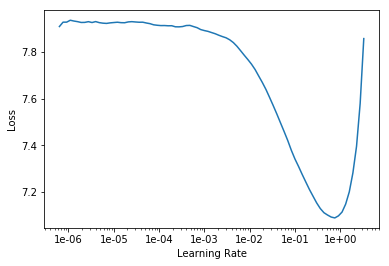

In [107]:
learn.recorder.plot()

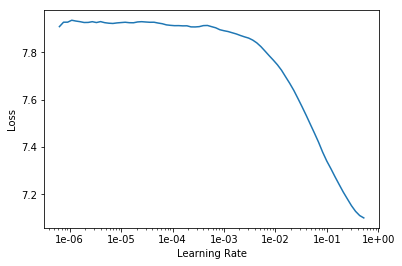

In [108]:
learn.recorder.plot(skip_end=15)

In [109]:
learn.fit_one_cycle(1, 3e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.853419,4.713702,0.214300,13:59


Was:
```
0	5.030068	4.740429	0.241762	00:27
```

But the vocabulary is much larger now.

In [110]:
learn.save('lm_fit_head')

## Unfreeze to fine-tune

In [111]:
learn.unfreeze()

In [114]:
from fastai.callbacks import *

In [115]:
torch.cuda.empty_cache()

In [116]:
# Save best model
# Should use lr=3e-3, but the curve is too flat in that area
learn.fit_one_cycle(10, 5e-3, moms=(0.8, 0.7), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='lm_fine_tune_best')])

epoch,train_loss,valid_loss,accuracy,time
0,4.497755,4.434875,0.243875,15:16
1,4.411441,4.349195,0.252422,15:04
2,4.373008,4.310836,0.256107,15:06
3,4.304352,4.274472,0.259289,15:21
4,4.254339,4.241254,0.263070,15:24
5,4.189385,4.211605,0.266117,15:26
6,4.110589,4.187427,0.269087,15:26
7,4.037763,4.172842,0.271036,15:26
8,3.958041,4.173563,0.271527,15:30
9,3.905365,4.179614,0.271290,15:31


Better model found at epoch 0 with accuracy value: 0.24387457966804504.
Better model found at epoch 1 with accuracy value: 0.2524217367172241.
Better model found at epoch 2 with accuracy value: 0.2561066746711731.
Better model found at epoch 3 with accuracy value: 0.2592894732952118.
Better model found at epoch 4 with accuracy value: 0.26307040452957153.
Better model found at epoch 5 with accuracy value: 0.26611700654029846.
Better model found at epoch 6 with accuracy value: 0.26908692717552185.
Better model found at epoch 7 with accuracy value: 0.2710358798503876.
Better model found at epoch 8 with accuracy value: 0.27152732014656067.


In [117]:
learn.save('lm_fine_tuned')

In [118]:
learn.save_encoder('lm_fine_tuned_encoder')

In [34]:
learn.load('lm_fine_tune_best')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1440000 items)
x: LMTextList
xxbos < url > - awww , that 's a bummer . you shoulda got david carr of third day to do it . ; d,xxbos is upset that he ca n't update his facebook by texting it ... and might cry as a result school today also . blah !,xxbos i dived many times for the ball . managed to save 50 % the rest go out of bounds,xxbos my whole body feels itchy and like its on fire,xxbos no , it 's not behaving at all . i 'm mad . why am i here ? because i ca n't see you all over there .
y: LMLabelList
,,,,
Path: data/sentiment140;

Valid: LabelList (160000 items)
x: LMTextList
xxbos listening to friends talk politics . should n't be this bored on my birthday , but i am,xxbos visiting with my baby nephew than my dads house ? idkk ! !,xxbos wow you have a blog na ) will link you up !,xxbos allies not coming over,xxbos yeah , it 's a bit daft - bing it ... hmm ... did m$ use a bunch of 5 year olds as their focus group ? < url >
y

In [120]:
learn.save_encoder('lm_fine_tune_best_encoder')

## Sentiment Classifier

In [35]:
df_test['validation'] = True
df_train['validation'] = False
df_all = df_train.append(df_test)
df_all.shape

(61989, 4)

In [36]:
df_all.head()

,id,label,tweet,validation
0,260097528899452929,neutral,won the match #getin . plus\u002c tomorrow is ...,False
1,263791921753882624,neutral,some areas of new england could see the first ...,False
2,264194578381410304,negative,2nd worst qb. definitely tony romo. the man w...,False
3,264041328420204544,neutral,#thailand washington - us president barack oba...,False
4,263816256640126976,neutral,did y\u2019all hear what tony romo dressed up ...,False


In [37]:
sentiment_data = (TextList.from_df(df_all, path=semeval_path, cols='tweet', vocab=data_lm.vocab)
                 .split_from_df(col='validation')
                 .label_from_df(cols='label')
                 .databunch(bs=bs))

In [38]:
sentiment_data.valid_ds

LabelList (11906 items)
x: TextList
xxbos # xxunk ari by ariana grande 80 % full < url > # singer # actress < url >,xxbos ariana grande kiis fm yours truly cd listening party in burbank < url > # xxunk,xxbos ariana grande white house easter egg roll in washington < url > # xxunk,xxbos # cd # musics ariana grande sweet like candy 3.4 oz 100 ml sealed in box 100 % xxunk new < url > xxunk < url >,xxbos side to side xxunk # xxunk # xxunk # musically # xxunk # lgbt xxunk # xxunk xxunk < url >
y: CategoryList
neutral,positive,positive,positive,neutral
Path: data/SemEval2017-4A-English

In [39]:
sentiment_data.classes

['negative', 'neutral', 'positive']

In [40]:
sentiment_data.show_batch()

text,target
xxbos all presidents of american except one are or have been related to the monarchy . david cameron is her 5th cousin ... < url > \n xxunk \t neutral \t on a we d at 10 am the queen always calls david cameron and pretends to be frank bruno . cameron falls for it every time # xxunk \n xxunk \t neutral \t david cameron says that,neutral
xxbos tomorrow \ xxunk i wake up in cebu ! ! ! : d so \ xxunk i \ xxunk have to log - off the internet and log - in to real life for a while ! good bye internet \ xxunk hello world !,positive
xxbos oh \ xxunk are we gon na have any august & emma scene on xxunk xxunk tallahassee xxunk xxunk ? just a yes or no and i \ xxunk be happy ( happier if it \ xxunk a yes ) !,positive
xxbos thanks to jesus \ xxunk cvs \ xxunk my mom & my mary ... i was able to kick this flu in 1 week ! now to make it w / out my maryjane until monday ! # struggles,positive
"xxbos how 's this for crazy ? david wright 's last 2 trips to the dl , he 's returned in philly with a hr in his 1st ab . also 9 / 20 / 13 vs. cole xxunk .",neutral


### Metrics

In [41]:
f1_score = partial(fbeta, beta=1)

In [42]:
def average_recall(y_pred, y):
    
    def compute_recall(tp_label, y_label):
        n_label = y_label.float().sum()
        if n_label == 0.0:
            return 0.0
        return tp_label.float().sum() / n_label
    
    n = y.shape[0]
    pred = y_pred.argmax(dim=-1).view(n, -1)
    y_true = y.view(n, -1)
        
    pred_neg = pred == 0
    y_neg = y_true == 0
    true_neg = pred_neg * y_neg

    pred_neu = pred == 1
    y_neu = y_true == 1
    true_neu = pred_neu * y_neu
    
    pred_pos = pred == 2
    y_pos = y_true == 2
    true_pos = pred_pos * y_pos
    
    recall_pos = compute_recall(true_pos, y_pos)
    recall_neg = compute_recall(true_neg, y_neg)
    recall_neu = compute_recall(true_neu, y_neu)
    
    #print("recall_pos", recall_pos, "recall_neg", recall_neg, "recall_neu", recall_neu)
    #print("true_pos", true_pos.float().sum(), "y_pos", y_pos.float().sum())
    #print("true_neg", true_neg.float().sum(), "y_neg", y_neg.float().sum())
    #print("true_neu", true_neu.float().sum(), "y_neu", y_neu.float().sum())
    #print("neg", y_neg.sum(), "neu", y_neu.sum(), "pos", y_pos.sum(), )
    
    return (recall_pos + recall_neg + recall_neu) / 3.0

In [43]:
metrics = [accuracy, average_recall]

**Note**: I had to create a symbolic link to the model inside `SemEval2017-4A-English/models` because the language models were saved inside the `sentiment140` data directory.

In [44]:
learn = text_classifier_learner(sentiment_data, AWD_LSTM, drop_mult=0.3, metrics=metrics)
learn.load_encoder('lm_fine_tune_best_encoder')

In [133]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


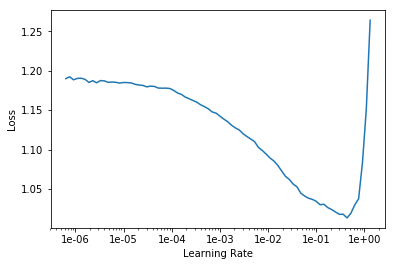

In [134]:
learn.recorder.plot()

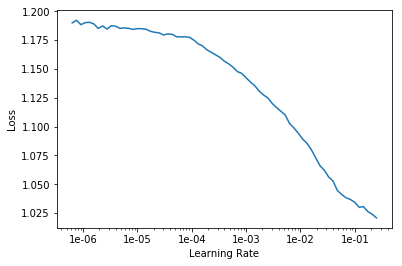

In [135]:
learn.recorder.plot(skip_end=14)

In [ ]:
from fastai.callbacks.misc import StopAfterNBatches

In [136]:
#learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7), callbacks=[StopAfterNBatches(n_batches=3)])
learn.fit_one_cycle(1, 3e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.790500,0.809465,0.617252,0.569147,00:18


### Look at the predictions


In [137]:
preds = learn.get_preds()

In [138]:
(preds[0].argmax(dim=-1))[:20]

tensor([2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0])

In [139]:
preds[1][:20]

tensor([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [140]:
predictions = preds[0].argmax(dim=1)
predictions

tensor([2, 2, 2,  ..., 0, 1, 0])

In [141]:
(predictions == 0).sum(), (predictions == 1).sum(), (predictions == 2).sum()

(tensor(2576), tensor(7149), tensor(2181))

In [142]:
targets = preds[1]
(targets == 0).sum(), (targets == 1).sum(), (targets == 2).sum()

(tensor(3811), tensor(5743), tensor(2352))

In [143]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [144]:
learn.show_results(rows=20)

text,target,prediction
xxbos for a long time no one considered the effect of repeated vaccinations on the brain . this was based on a mistaken ... < url > \n xxunk \t neutral \t xxunk caused death in america - every case of sids - the made up phenomena to cover up death by vaccines . < url > \n xxunk \t neutral \t study proving vaccines cause autism banned,negative,positive
"xxbos donald trump has reversed himself on abortion , banning muslims and even his central promise of building a wall on xxunk < url > \n xxunk \t positive \t bill clinton built a wall on the mexican border in the 90s . # xxunk \n xxunk \t neutral \t < email > the is prepared to do a deal - u axe ur wall on mexican border",neutral,positive
"xxbos in the past year alone , over 100 women from limerick have travelled to the uk to get access to abortion services ... < url > \n xxunk \t neutral \t 1 of america 's greatest presidents # xxunk quote on abortion xxunk i 've noticed that everyone who is for abortion xxunk < url > \n xxunk \t negative \t like it 's about abortion xxunk",neutral,positive
"xxbos the patches ] are being used to kill people with dementia , with the idea that it xxunk cheapest and best to get rid of xxunk < url > \n xxunk \t neutral \t important for research paper : should euthanasia / assisted suicide be an option for suffering xxunk ill patience \n xxunk \t negative \t when euthanasia is xxunk , i 'm not going",negative,negative
xxbos i do n't support animal cruelty but i 'm okay with giving my money to companies that do so they continue testing on xxunk < url > \n xxunk \t negative \t i 'm not for the animal cruelty or animal testing tbh \n xxunk \t neutral \t i just do n't get what 's the big deal of using mac products like i love mac &,neutral,negative
"xxbos of course they would cease ; no clinton in high power right now , so no cash ! watch charity foundation cease to xxunk xxunk < url > \n xxunk \t neutral \t i see that jill stein filed to have a vote recount in wisconsin . i wonder how much she received from the clinton foundation for her service \n xxunk \t neutral \t no",negative,negative
xxbos the alleged xxunk came the same day that ukrainian president xxunk xxunk met with eu leaders for a summ xxunk < url > \n xxunk \t neutral \t i 'll say it again . i 'm willing to bet a crate of xxunk that xxunk will use xxunk 's 1999 strategy and win the presidential election \n xxunk \t neutral \t xxunk sure trump will not change,neutral,negative
"xxbos donald trump is xxunk just xxunk to undo us climate policies as president . his transition team is also talking ... < url > \n xxunk \t negative \t instead of being xxunk at the spectacle of trump 's transition , liberals should try a more level - headed approach . xxunk < url > \n xxunk \t neutral \t it 's kris xxunk 's plan ...",negative,positive
"xxbos he wants to break up the country xxunk biggest companies , meet with xxunk korean leader kim jong un & throw president p xxunk < url > \n xxunk \t neutral \t shout out car crashes . shout out kim jong un . shout out the lakers maybe signing him to a 10-day for this game . < url > \n xxunk \t neutral \t the",neutral,neutral
xxbos all 11 of the uk xxunk most senior judges will take their seats on the supreme court bench on monday to decide ... < url > \n xxunk \t negative \t depressing how many people deluded that supreme court are deciding whether xxunk referendum is overturned \n xxunk \t neutral \t for # xxunk we had a 650 page xxunk the # xxunk was based on,neutral,neutral


In [145]:
learn.save('sent140-first')

In [146]:
learn.load('sent140-first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # getin . plus \ xxunk tomorrow is a very busy day \ xxunk with awareness day \ xxunk and debates . gulp . debates ...,xxbos some areas of new england could see the first flakes of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ xxunk hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ xxunk all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # xxunk ari by ariana grande 80 % full < url > # singer # actress < url >,xxbos ariana grande kiis fm yours truly cd listening party in burbank < url > # xxu

In [147]:
learn.freeze_to(-2)

In [148]:
torch.cuda.empty_cache()

### Reduce batch size because 100 doesn't fit

In [149]:
[dl.batch_size for dl in sentiment_data.dls]

[100, 100, 100, 1]

In [150]:
new_bs = 60
for dl in sentiment_data.dls:
    if dl.batch_size == bs:
        dl.batch_size = new_bs
[dl.batch_size for dl in sentiment_data.dls]

[60, 60, 60, 1]

In [151]:
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.733597,0.778971,0.636066,0.602474,00:27


In [152]:
learn.save('sent140-second')

In [153]:
learn.load('sent140-second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # getin . plus \ xxunk tomorrow is a very busy day \ xxunk with awareness day \ xxunk and debates . gulp . debates ...,xxbos some areas of new england could see the first flakes of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ xxunk hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ xxunk all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # xxunk ari by ariana grande 80 % full < url > # singer # actress < url >,xxbos ariana grande kiis fm yours truly cd listening party in burbank < url > # xxu

In [154]:
torch.cuda.empty_cache()

### Reduce `batch_size` a lot

I believe there are memory leaks or memory management problems. After the following change I observed a GPU memory usage of 29%, but if I tried to increase the batch size I got an out-of-memory error.

In [155]:
#bs = new_bs
#new_bs = 5
#for dl in sentiment_data.dls:
#    if dl.batch_size == bs:
#        dl.batch_size = new_bs
#[dl.batch_size for dl in sentiment_data.dls]

In [156]:
learn.unfreeze()

In [157]:
learn.freeze_to(-3)

In [158]:
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.693925,0.766031,0.649924,0.615983,00:42


In [159]:
learn.save('sent140-third')

In [45]:
learn.load('sent140-third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (50083 items)
x: TextList
xxbos won the match # getin . plus \ xxunk tomorrow is a very busy day \ xxunk with awareness day \ xxunk and debates . gulp . debates ...,xxbos some areas of new england could see the first flakes of the season tuesday .,xxbos 2nd worst qb . definitely tony romo . the man who likes to share the ball with everyone . including the other team .,xxbos # thailand washington - us president barack obama vowed wednesday as he visited storm - ravaged new jersey shore to ... < url >,xxbos did y \ xxunk hear what tony romo dressed up as for halloween ? a giants xxunk ! cause that \ xxunk all he could throw to sunday night .
y: CategoryList
neutral,neutral,negative,neutral,neutral
Path: data/SemEval2017-4A-English;

Valid: LabelList (11906 items)
x: TextList
xxbos # xxunk ari by ariana grande 80 % full < url > # singer # actress < url >,xxbos ariana grande kiis fm yours truly cd listening party in burbank < url > # xxu

In [48]:
new_bs = 100

In [49]:
torch.cuda.empty_cache()
bs = new_bs
new_bs = 40
for dl in sentiment_data.dls:
    if dl.batch_size == bs:
        dl.batch_size = new_bs
[dl.batch_size for dl in sentiment_data.dls]

[40, 40, 40, 1]

In [50]:
learn.unfreeze()

In [51]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,average_recall,time
0,0.659032,0.766349,0.646481,0.626558,01:15
1,0.644873,0.763430,0.647405,0.621510,01:16


Final results with Sentiment140 data, epoch 0 above:

```
train_loss  valid_loss  accuracy    average_recall
0.659032	0.766349	0.646481	0.626558
```

It does not represent an improvement over the best previous version (average_recall = 0.628) even though the accuracy is slightly better. The use of more training data for the language model did not help, so the bottleneck is possibly the amount of training data we use for classification.

Should we use the sentiment-140 dataset for classification as well? Keep in mind that it was automatically annotated based on the existence of happy / sad emoticons.

Another idea is to tune the loss function to take into account class imbalance.

Yet another idea is to use BERT, if it's not already in use inside the fastai library.